### IBM HR Analytics Employee Attrition & Performance


#### About Dataset 

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [13]:
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import random as rn
from functools import reduce 

### import Data

In [14]:
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


### Detailed Description of IBM HR Dataset

 - > In this dataset is composed of 35 columns and 1470 rows.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Read data and calculate number of rows and columns


In [16]:
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 35


#### Categorical columns

In [17]:

categorical= df.select_dtypes(include=['object', 'category']).columns
print(categorical)


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


### Numerical columns

In [18]:
numerical = df.select_dtypes(include=['int', 'float']).columns
print(numerical)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### Missing data


#### Check if the DataFrame any missing values

In [19]:
missing_value = df.isnull().values.any()
# count the number of missing values in each column
num_missing_values = df.isnull().sum()

if missing_value:
    print(f"---> Number of missing values in each column:{num_missing_values}")
else:
    print(" ---> The DataFrame does not have contain any missing values.")

 ---> The DataFrame does not have contain any missing values.


### Duplicate Records

### Check if the DataFrame duplicated records

In [20]:
duplicated_data = df.duplicated()

num_duplicated_data = df.duplicated().sum()
if duplicated_data.any():
    print(f"Number of duplicated records: {num_duplicated_data}")
else:
    print("---> The DataFrame does not contain any dupplicated recorda.")  


---> The DataFrame does not contain any dupplicated recorda.


### Check uniformed values

In [21]:
uniformed_columns = []
for i in df.columns:
    unique_values = df[i].dropna().unique()
    
    if len(unique_values) == 1:
        uniformed_columns.append(i)
if uniformed_columns:
    
    for i in uniformed_columns:
        print("The DataFrame contains columns with uniformed values:", i)
else:
    
    print("The DataFrame does not contain columns with uniformed values.")
    
    

The DataFrame contains columns with uniformed values: EmployeeCount
The DataFrame contains columns with uniformed values: Over18
The DataFrame contains columns with uniformed values: StandardHours


##### Reassing response variable

Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively). This is what we will predict.

In [22]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df["Attrition"]

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

#### Drop useless 

In [23]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

#### Change Object types to categories 



In [24]:
categories_data = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in categories_data:
    df2[col] = df2[col].astype('category')

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

# Data Analysis 

### 1, What is the attrition rate for the company, and what are the factors that contribute to it?

to calculate the attrition rate for the company, you need to determine the proportion of employees who have left the company compared to the total number of employees. 

In the company, there are 1470 employees. 237 employees who compose 16% of the total number of employee left the company for some reasons. 

Besides that, 1233 employee is currently continuing to work in the same company.




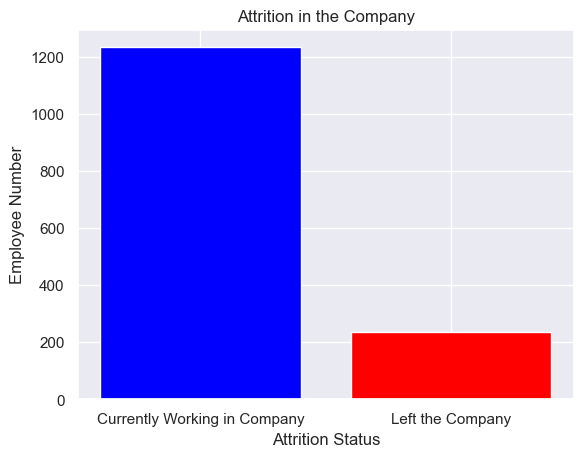

Currently Working in Company: 1233
Left the Company: 237


'In the company, there are 1470 employees. 237 employees who compose 16% of the \ntotal number of employee left the company for some reasons. Besides that, 1233 employee \nis currently continuing to work in the same company.\n'

In [26]:
"""
attrition_counts = variable contains the count of employees in each attrition category('Currently Working in Company' and 'Left the Company').
The count of employees who have left the company can be accessed with attrition_counts['Left the Company']. Dividing this count by the sum 
of the counts for both categories gives you the proportion of employees who have left. Multiplying by 100 gives the percentage attrition rate. 
Finally, the attrition rate is rounded to two decimal places using round().
"""
attrition_counts = df2['Attrition'].value_counts()
attrition_rate_percentage = (attrition_counts[1] / attrition_counts.sum()) * 100
attrition_rate_percentage = round(attrition_rate_percentage, 2)

# Create bar plot
colors = ['blue', 'red']
plt.bar(attrition_counts.index, attrition_counts.values, color=colors)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')

# Change x-axis tick labels
plt.xticks(attrition_counts.index, ['Currently Working in Company', 'Left the Company'])

plt.show()


print("Currently Working in Company:", attrition_counts[0])
print("Left the Company:", attrition_counts[1])

"""In the company, there are 1470 employees. 237 employees who compose 16% of the 
total number of employee left the company for some reasons. Besides that, 1233 employee 
is currently continuing to work in the same company.
"""

### 2. Is there a relationship between distance from home and attrition, and does it vary by job role?


In [27]:
"""This line creates a new DataFrame called subset_df by selecting specific columns from the original DataFrame df2.
The columns included are 'Attrition', 'DistanceFromHome', and 'JobRole'. """

subset_df = df2[['Attrition', 'DistanceFromHome', 'JobRole']]
subset_df

,Attrition,DistanceFromHome,JobRole
0,1,1,Sales Executive
1,0,8,Research Scientist
2,1,2,Laboratory Technician
3,0,3,Research Scientist
4,0,2,Laboratory Technician
...,...,...,...
1465,0,23,Laboratory Technician
1466,0,6,Healthcare Representative
1467,0,4,Manufacturing Director
1468,0,2,Sales Executive


2, Perform a correlation test between 'DistanceFromHome' and 'Attrition'

In [28]:
correlation = subset_df['DistanceFromHome'].corr(subset_df['Attrition'])
print("Correlation between DistanceFromHome and Attrition:", correlation)


Correlation between DistanceFromHome and Attrition: 0.07792358295570376


1.2 , print the correlation coefficient between the two variables.
    Compare attrition rates across different job roles:

In [29]:
attrition_by_job_role = subset_df.groupby('JobRole')['Attrition'].mean()
print(attrition_by_job_role)

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: Attrition, dtype: float64


3, Visualize the attrition rates by job role using a bar plot: 

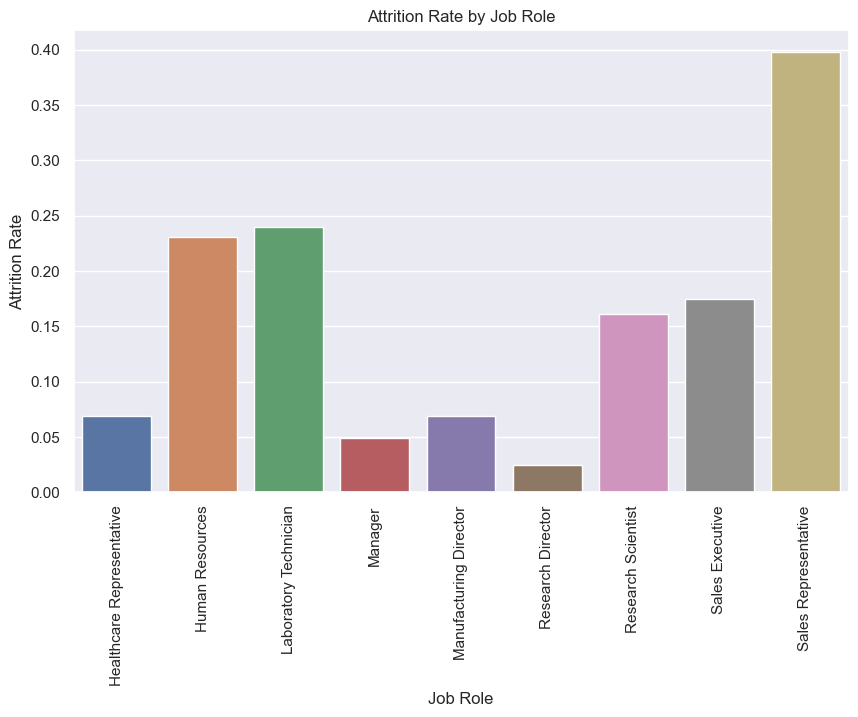

"It subsets the DataFrame df2 to include only the columns 'Attrition', 'DistanceFromHome', and 'JobRole'.\nIt calculates the overall correlation between distance from home and attrition for the entire dataset.\nIt calculates the mean attrition rate by job role."

In [30]:
# Bar plot of attrition rates by job role
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_by_job_role.index, y=attrition_by_job_role.values)
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=90)
plt.show()

"""It subsets the DataFrame df2 to include only the columns 'Attrition', 'DistanceFromHome', and 'JobRole'.
It calculates the overall correlation between distance from home and attrition for the entire dataset.
It calculates the mean attrition rate by job role."""

##### It calculates the correlation between distance from home and attrition for each unique job role.

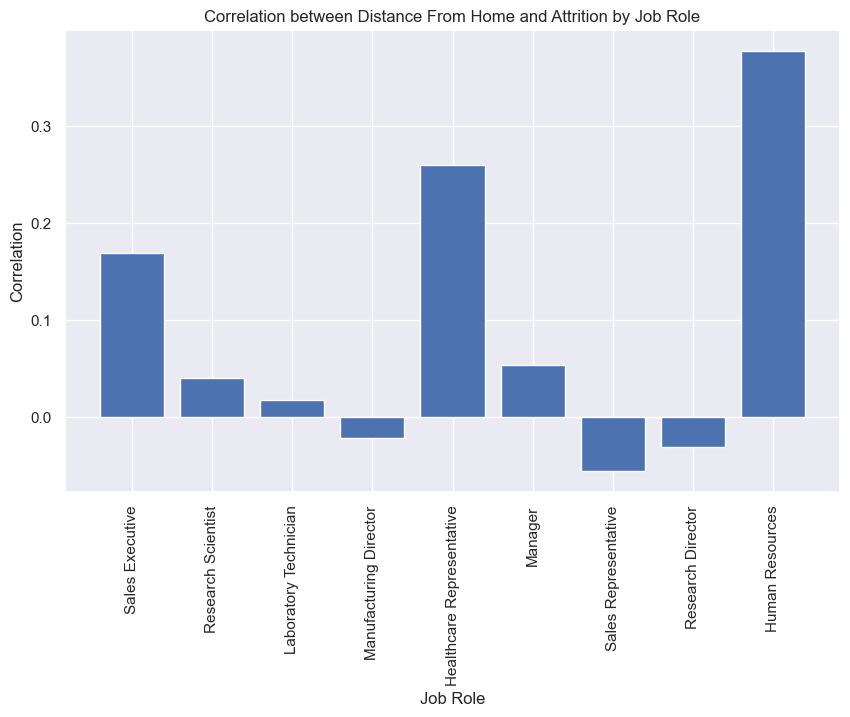

In [31]:
job_roles = df2['JobRole'].unique()

correlations = {} 
for role in job_roles:
    
    subset = df2[df2['JobRole'] == role]
    # subset = Sales Executive, 0.1 , 1
    
    correlation = subset['DistanceFromHome'].corr(subset['Attrition'])
    
    # correlation = Sales Executiv 0.1698105188381547
    correlations[role] = correlation


plt.figure(figsize=(10, 6))
plt.bar(range(len(correlations)), list(correlations.values()), align='center')
plt.xticks(range(len(correlations)), list(correlations.keys()), rotation=90)
plt.xlabel('Job Role')
plt.ylabel('Correlation')
plt.title('Correlation between Distance From Home and Attrition by Job Role')
plt.show()


### 3, How does employee education level affect their monthly income, and does this impact attrition rates?

### 4, Are there any gender differences in job satisfaction, and does this impact attrition rates?

### 5, What factors are associated with employee performance ratings, and is there a relationship between performance ratings and attrition?